In [1]:
%cd ..

d:\github\ripple_heterogeneity\python


In [2]:
import pandas as pd
import numpy as np 
import glob
import matplotlib.pyplot as plt

# import hdf5storage
# import h5py
import scipy.io as sio
import seaborn as sns
# import sys,os
import os

import functions,loading

import nelpy as nel  # main nelpy imports
import nelpy.plotting as npl  # optional plotting import

# import math
import statistics
from mpl_toolkits.axes_grid1 import make_axes_locatable
from matplotlib.ticker import AutoMinorLocator


C:\Users\Cornell\anaconda3\envs\ripple_diversity\lib\site-packages\nelpy\plotting\decoding.py:9: MatplotlibDeprecationWarning: 
The mpl_toolkits.axes_grid module was deprecated in Matplotlib 2.1 and will be removed two minor releases later. Use mpl_toolkits.axes_grid1 and mpl_toolkits.axisartist, which provide the same functionality instead.


In [3]:
tex_fonts = {
#     # Use LaTeX to write all text
#     "text.usetex": True,
    "font.family": "serif",
    # Use 10pt font in plots, to match 10pt font in document
    "axes.labelsize": 10,
    "font.size": 10,
    # Make the legend/label fonts a little smaller
    "legend.fontsize": 8,
    "xtick.labelsize": 8,
    "ytick.labelsize": 8,
    "svg.fonttype": 'none'
}
plt.style.use('seaborn-paper')
plt.rcParams.update(tex_fonts)

# plt.rcParams['svg.fonttype'] = 'none'

%config InlineBackend.figure_format = 'retina'

fig_save_path = 'G:/My Drive/post_doc/ripple_diversity/project_log'

In [4]:
basepaths = ['A:/Data/GrosmarkAD/Cicero/Cicero_09012014',
    'A:/Data/GrosmarkAD/Cicero/Cicero_09102014',
    'A:/Data/GrosmarkAD/Cicero/Cicero_09172014',
    'A:/Data/GrosmarkAD/Buddy/Buddy_06272013',
    'A:/Data/GrosmarkAD/Achilles/Achilles_10252013',
    'A:/Data/GrosmarkAD/Achilles/Achilles_11012013',
    'A:/Data/GrosmarkAD/Gatsby/Gatsby_08282013',
    'A:/Data/GrosmarkAD/Gatsby/Gatsby_08022013']

In [37]:
swr_unit_metric = pd.DataFrame()
for basepath in basepaths:

    temp_swr_unit_metric = loading.load_SWRunitMetrics(basepath)
    temp_cell_metrics,_ = loading.load_cell_metrics(basepath)
    temp_df_rem_shift,_ = loading.load_theta_rem_shift(basepath)

    for _ in range(temp_swr_unit_metric.epoch.nunique()-1):
        temp_cell_metrics = temp_cell_metrics.append(temp_cell_metrics,ignore_index=True)
    
    temp_swr_unit_metric['deepSuperficial'] = temp_cell_metrics.deepSuperficial
    temp_swr_unit_metric['brainRegion'] = temp_cell_metrics.brainRegion
    temp_swr_unit_metric['putativeCellType'] = temp_cell_metrics.putativeCellType
    temp_swr_unit_metric['basepath'] = temp_cell_metrics.basepath

    for _ in range(temp_swr_unit_metric.epoch.nunique()-1):
        temp_df_rem_shift = temp_df_rem_shift.append(temp_df_rem_shift,ignore_index=True)

    temp_swr_unit_metric['rem_shift'] = temp_df_rem_shift.rem_shift
    temp_swr_unit_metric['non_rem_shift'] = temp_df_rem_shift.non_rem_shift

    swr_unit_metric = swr_unit_metric.append(temp_swr_unit_metric,ignore_index=True)
    

swr_unit_metric

,particip,FRall,FRparticip,nSpkAll,nSpkParticip,epoch,deepSuperficial,brainRegion,putativeCellType,basepath,rem_shift,non_rem_shift
0,0.000389,0.002364,5.667892,0.000389,1.000000,pre,Deep,lCA1,Pyramidal Cell,A:\Data\GrosmarkAD\Cicero\Cicero_09012014,0,0
1,0.010297,0.062652,5.909948,0.010297,1.000000,pre,Deep,lCA1,Pyramidal Cell,A:\Data\GrosmarkAD\Cicero\Cicero_09012014,0,0
2,0.356713,3.124306,8.559614,0.513503,1.439542,pre,Superficial,lCA1,Pyramidal Cell,A:\Data\GrosmarkAD\Cicero\Cicero_09012014,1,0
3,0.016514,0.102843,5.993766,0.016903,1.023529,pre,Superficial,lCA1,Pyramidal Cell,A:\Data\GrosmarkAD\Cicero\Cicero_09012014,0,0
4,0.775986,16.170025,20.641224,2.657665,3.424887,pre,Superficial,lCA1,Narrow Interneuron,A:\Data\GrosmarkAD\Cicero\Cicero_09012014,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...
2479,0.144218,1.384299,9.373945,0.226395,1.569811,post,Deep,rCA1,Pyramidal Cell,A:\Data\GrosmarkAD\Gatsby\Gatsby_08022013,0,1
2480,0.275374,3.454091,12.158093,0.564898,2.051383,post,Deep,rCA1,Pyramidal Cell,A:\Data\GrosmarkAD\Gatsby\Gatsby_08022013,1,0
2481,0.216871,2.006567,9.143294,0.328163,1.513174,post,Deep,rCA1,Pyramidal Cell,A:\Data\GrosmarkAD\Gatsby\Gatsby_08022013,0,0
2482,0.123537,0.979990,7.891678,0.160272,1.297357,post,Deep,rCA1,Pyramidal Cell,A:\Data\GrosmarkAD\Gatsby\Gatsby_08022013,0,1


In [40]:
print(swr_unit_metric[swr_unit_metric.epoch=="pre"].shape)
print(swr_unit_metric[swr_unit_metric.epoch=="pre"].brainRegion.value_counts())
print(swr_unit_metric[swr_unit_metric.epoch=="pre"].putativeCellType.value_counts())
print(swr_unit_metric[swr_unit_metric.epoch=="pre"].basepath.value_counts())

(828, 12)
rCA1    445
lCA1    383
Name: brainRegion, dtype: int64
Pyramidal Cell        645
Narrow Interneuron    177
Wide Interneuron        6
Name: putativeCellType, dtype: int64
A:\Data\GrosmarkAD\Achilles\Achilles_10252013    275
A:\Data\GrosmarkAD\Cicero\Cicero_09102014        105
A:\Data\GrosmarkAD\Achilles\Achilles_11012013    104
A:\Data\GrosmarkAD\Gatsby\Gatsby_08022013         80
A:\Data\GrosmarkAD\Cicero\Cicero_09012014         73
A:\Data\GrosmarkAD\Cicero\Cicero_09172014         72
A:\Data\GrosmarkAD\Buddy\Buddy_06272013           68
A:\Data\GrosmarkAD\Gatsby\Gatsby_08282013         51
Name: basepath, dtype: int64


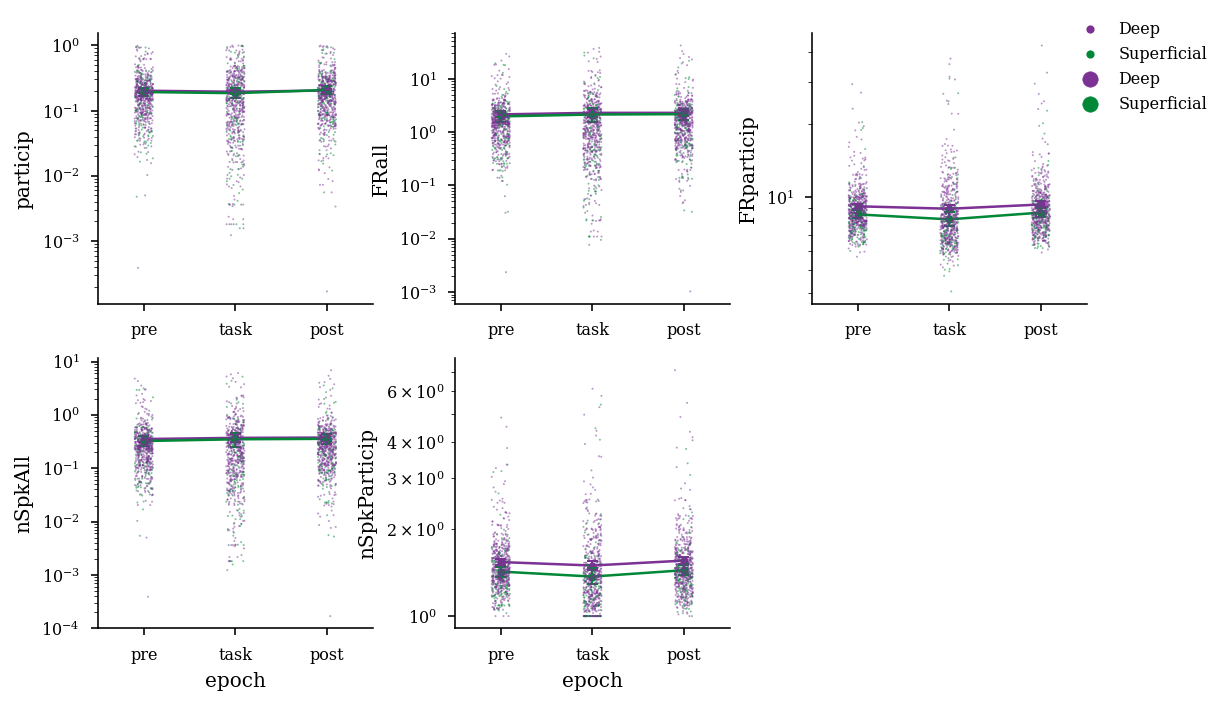

In [23]:
def plot_paired_plot(df,y,group_colors,ax,x="epoch",hue="deepSuperficial"):
    sns.pointplot(
            data=df,
            x=x, 
            y=y, 
            hue=hue,
            ci=95,
            capsize=.1, 
            hue_order=group_colors.keys(), 
            kind="point",
            ax=ax,
            scale=.5,
            errwidth=1
            ) 
    sns.stripplot(x=x, y=y,hue=hue,hue_order=group_colors.keys(),
        data=df,size=1,linewidth=0,ax=ax,alpha=.5)

fig, axs = plt.subplots(2,3, figsize=functions.set_size('thesis', fraction=1.5, subplots=(3, 3)), edgecolor='k')
fig.subplots_adjust(hspace = 0.2, wspace=.3)
axs = axs.ravel()

group_colors = {"Deep": '#7b3294',
            'Superficial': '#008837'} 
sns.set_palette(sns.color_palette(group_colors.values()))

idx = (swr_unit_metric.putativeCellType=="Pyramidal Cell")

plot_paired_plot(swr_unit_metric[idx],"particip",group_colors,axs[0])
plot_paired_plot(swr_unit_metric[idx],"FRall",group_colors,axs[1])
plot_paired_plot(swr_unit_metric[idx],"FRparticip",group_colors,axs[2])
plot_paired_plot(swr_unit_metric[idx],"nSpkAll",group_colors,axs[3])
plot_paired_plot(swr_unit_metric[idx],"nSpkParticip",group_colors,axs[4])

axs[0].legend("",frameon=False)
axs[1].legend("",frameon=False)
axs[3].legend("",frameon=False)
axs[4].legend("",frameon=False)

axs[2].legend(loc='best', bbox_to_anchor=(.9, 0., 0.5, 1.1),frameon=False)
    
for i in range(6):
    right_side = axs[i].spines["right"]
    right_side.set_visible(False)
    top_side = axs[i].spines["top"]
    top_side.set_visible(False)
    axs[i].yaxis.set_minor_locator(AutoMinorLocator())

axs[5].axes.get_xaxis().set_ticks([])
axs[5].axes.get_yaxis().set_ticks([])

right_side = axs[5].spines["left"]
right_side.set_visible(False)
top_side = axs[5].spines["bottom"]
top_side.set_visible(False)

axs[0].set_xlabel("")
axs[1].set_xlabel("")
axs[2].set_xlabel("")

axs[0].set_yscale("log")
axs[1].set_yscale("log")
axs[2].set_yscale("log")
axs[3].set_yscale("log")
axs[4].set_yscale("log")

plt.savefig(os.path.join(fig_save_path,'novel_task_pre_task_post.pdf'),dpi=300,bbox_inches='tight')